In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns
from scipy import stats
from scipy.stats import norm,skew

In [2]:
df=pd.read_csv('C:/Users/Abc/Desktop/train.csv')

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


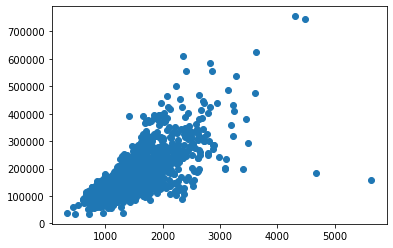

In [7]:
plt.scatter('GrLivArea','SalePrice',data=df)

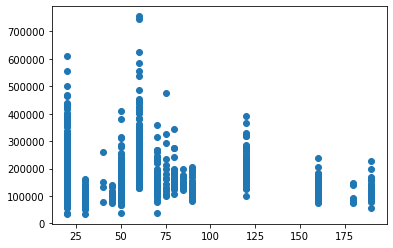

In [8]:
plt.scatter('MSSubClass','SalePrice',data=df)

In [9]:
pd.get_dummies(data=df,columns=['OverallCond'])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SalePrice,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,208500,0,0,0,0,1,0,0,0,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,181500,0,0,0,0,0,0,0,1,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,223500,0,0,0,0,1,0,0,0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,140000,0,0,0,0,1,0,0,0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,250000,0,0,0,0,1,0,0,0,0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,143000,0,0,0,0,1,0,0,0,0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,307000,0,0,0,0,1,0,0,0,0
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,200000,0,0,0,0,0,1,0,0,0
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,129900,0,0,0,0,1,0,0,0,0
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,118000,0,0,0,0,0,1,0,0,0


In [10]:
pd.get_dummies(df['OverallCond'])

,1,2,3,4,5,6,7,8,9
0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,0,0
6,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,1,0,0,0
8,0,0,0,0,1,0,0,0,0
9,0,0,0,0,0,1,0,0,0


In [11]:
pd.get_dummies(df['OverallCond'],drop_first=True)

,2,3,4,5,6,7,8,9
0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0
5,0,0,0,1,0,0,0,0
6,0,0,0,1,0,0,0,0
7,0,0,0,0,1,0,0,0
8,0,0,0,1,0,0,0,0
9,0,0,0,0,1,0,0,0


In [12]:
pd.get_dummies(data=df,columns=['OverallCond'],prefix_sep='abc')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SalePrice,OverallCondabc1,OverallCondabc2,OverallCondabc3,OverallCondabc4,OverallCondabc5,OverallCondabc6,OverallCondabc7,OverallCondabc8,OverallCondabc9
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,208500,0,0,0,0,1,0,0,0,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,181500,0,0,0,0,0,0,0,1,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,223500,0,0,0,0,1,0,0,0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,140000,0,0,0,0,1,0,0,0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,250000,0,0,0,0,1,0,0,0,0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,143000,0,0,0,0,1,0,0,0,0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,307000,0,0,0,0,1,0,0,0,0
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,200000,0,0,0,0,0,1,0,0,0
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,129900,0,0,0,0,1,0,0,0,0
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,118000,0,0,0,0,0,1,0,0,0


In [13]:
pd.concat([df['SalePrice'],df['GrLivArea'],df['OverallQual']],axis=1)

,SalePrice,GrLivArea,OverallQual
0,208500,1710,7
1,181500,1262,6
2,223500,1786,7
3,140000,1717,7
4,250000,2198,8
5,143000,1362,5
6,307000,1694,8
7,200000,2090,7
8,129900,1774,7
9,118000,1077,5


In [14]:
pd.concat([df['SalePrice'],df['GrLivArea'],df['OverallQual']],axis=0)

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430         5
1431         6
1432         4
1433         6
1434         5
1435         6
1436         4
1437         8
1438         6
1439         7
1440         6
1441         6
1442        10
1443         6
1444         7
1445         6
1446         5
1447         8
1448         4
1449         5
1450         5
1451         8
1452         5
1453         5
1454         7
1455         6
1456         6
1457         7
1458         5
1459         5
Length: 4380, dtype: int64

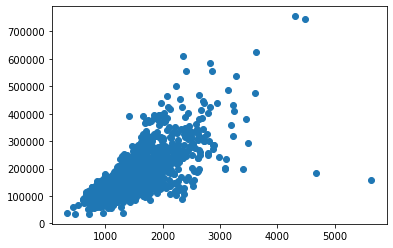

In [15]:
plt.scatter(x='GrLivArea',y='SalePrice',data=df)

In [16]:
df['GrLivArea']<4000

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
        ... 
1430    True
1431    True
1432    True
1433    True
1434    True
1435    True
1436    True
1437    True
1438    True
1439    True
1440    True
1441    True
1442    True
1443    True
1444    True
1445    True
1446    True
1447    True
1448    True
1449    True
1450    True
1451    True
1452    True
1453    True
1454    True
1455    True
1456    True
1457    True
1458    True
1459    True
Name: GrLivArea, Length: 1460, dtype: bool

In [17]:
df1=df[df['GrLivArea']<4000]

# df1

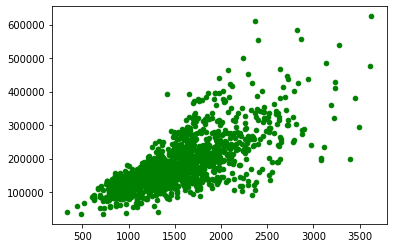

In [19]:
plt.scatter(x='GrLivArea',y='SalePrice',data=df1,s=21,c='green')

In [20]:
df.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
7,False,False,False,True,False,False,True,False,False,False,...,False,True,True,False,False,False,False,False,False,False
8,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
9,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [21]:
Total=df.isnull().sum(axis=1)

In [22]:
Total

0        5
1        4
2        4
3        4
4        4
5        3
6        4
7        4
8        4
9        4
10       5
11       4
12       6
13       4
14       4
15       4
16       4
17       9
18       5
19       4
20       4
21       2
22       4
23       4
24       4
25       4
26       5
27       4
28       4
29       5
        ..
1430     4
1431     6
1432     4
1433     4
1434     4
1435     3
1436     4
1437     4
1438     4
1439     4
1440     4
1441     5
1442     4
1443     5
1444     5
1445     5
1446     6
1447     4
1448     4
1449    10
1450    10
1451     4
1452     5
1453    10
1454     4
1455     4
1456     3
1457     2
1458     5
1459     5
Length: 1460, dtype: int64

In [23]:
Per=df.isnull().sum()/len(df)*100

In [24]:
Per

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
                   ...    
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
KitchenQual       0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
Fireplaces        0.000000
F

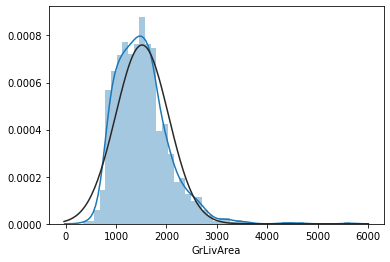

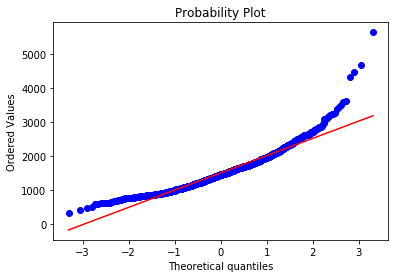

In [25]:
sns.distplot(df['GrLivArea'],fit=norm);
fig=plt.figure()
res=stats.probplot(df['GrLivArea'],plot=plt)

In [146]:
# squareroot, log